In [11]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np 

In [12]:
def oraculo_classico(x):
    fun = (x**2 + 2**x + 3) % 2
    print(f"f{x} = {fun}")
    return fun

f_0 = oraculo_classico(0) 
f_1 = oraculo_classico(1)

if f_0 == f_1:
    print("constante")
else:
    print("balanceada")

f0 = 0
f1 = 0
constante


In [13]:
def oraculo_classico(x):
    fun = (2**x + 4) % 2
    print(f"f{x} = {fun}")
    return fun

f_0 = oraculo_classico(0) 
f_1 = oraculo_classico(1)

if f_0 == f_1:
    print("constante")
else:
    print("balanceada")

f0 = 1
f1 = 0
balanceada


oraculo sorteado:  constante_0
{'0': 1}


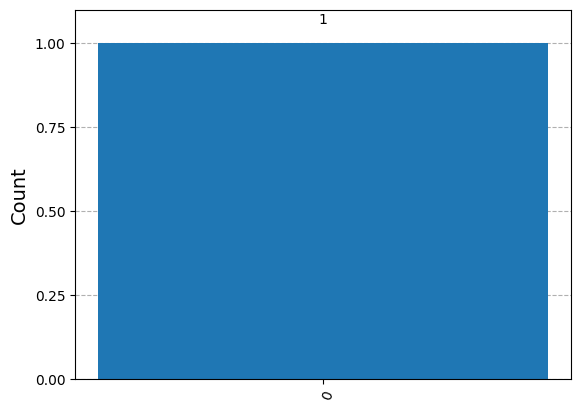

In [14]:
def constante_0(qc):
    pass

def constante_1(qc):
    qc.x(1)

def balanceada_0(qc):
    qc.cx(0,1) 

def balanceada_1(qc):
    qc.x(0)
    qc.cx(0,1)
    qc.x(0) 


list_oraculos = [constante_0, constante_1, balanceada_0, balanceada_1]
sortea_oraculo = np.random.choice(list_oraculos)
print("oraculo sorteado: ", sortea_oraculo.__name__)


def deutsch(oraculo):
    qc = QuantumCircuit(2,1)
    qc.x(1)
    qc.h(0)
    qc.h(1)

    qc.barrier()

    oraculo(qc)

    qc.barrier()

    qc.h(0) 
    qc.measure(0,0) 

    return qc 

qc = deutsch(sortea_oraculo)



sim = AerSimulator()


compile = transpile(qc, sim) 
result = sim.run(compile, shots =1).result()
couts = result.get_counts()
print(couts)


plot_histogram(couts)

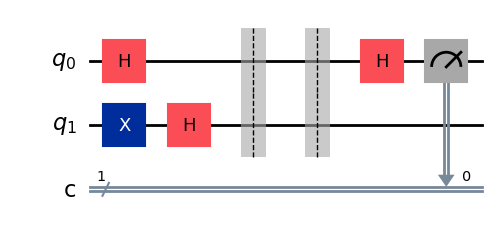

In [15]:
qc.draw('mpl')

{'1': 1}


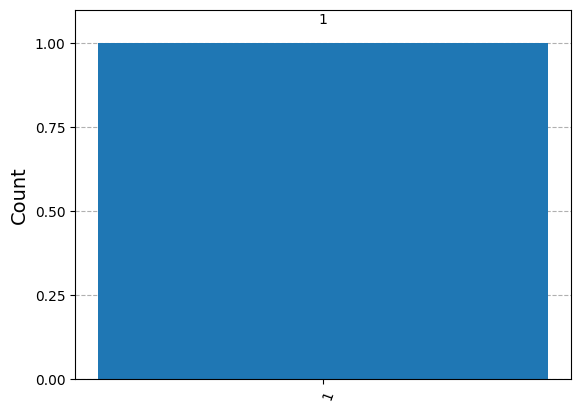

In [16]:
sim = AerSimulator()
qc = deutsch(balanceada_1) 

compile = transpile(qc, sim) 
result = sim.run(compile, shots =1).result()
couts = result.get_counts()
print(couts)


plot_histogram(couts)
